In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Mumbai House Prices.csv")

# **EXPLORATORY DATA ANALYSIS**

In [3]:
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [4]:
data.tail()

,bhk,type,locality,area,price,price_unit,region,status,age
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown
76037,5,Apartment,Sunteck Signature Island,5200,25.00,Cr,Bandra Kurla Complex,Ready to move,Unknown


In [5]:
rows, columns = data.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 76038
Number of columns: 9


In [6]:
unique_counts = data.nunique()
print(unique_counts)

bhk             10
type             5
locality      9782
area          2331
price         4729
price_unit       2
region         228
status           2
age              3
dtype: int64


**Locality, Area and region have high cardinality**

In [7]:
print(data.dtypes)

bhk             int64
type           object
locality       object
area            int64
price         float64
price_unit     object
region         object
status         object
age            object
dtype: object


In [8]:
null_counts = data.isnull().sum()
print(null_counts)

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64


In [9]:
# turning Cr into Lakhs
# Define a function to apply the transformation
def adjust_price(row):
    if row['price_unit'] == 'Cr':
        return row['price'] * 100
    return row['price']

# Apply the function to the 'price' column
data['price'] = data.apply(adjust_price, axis=1)

In [10]:
data_new = data.drop(columns=['price_unit'])

In [11]:
data_new.head()

,bhk,type,locality,area,price,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,250.00,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,173.00,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,Mira Road East,Under Construction,New


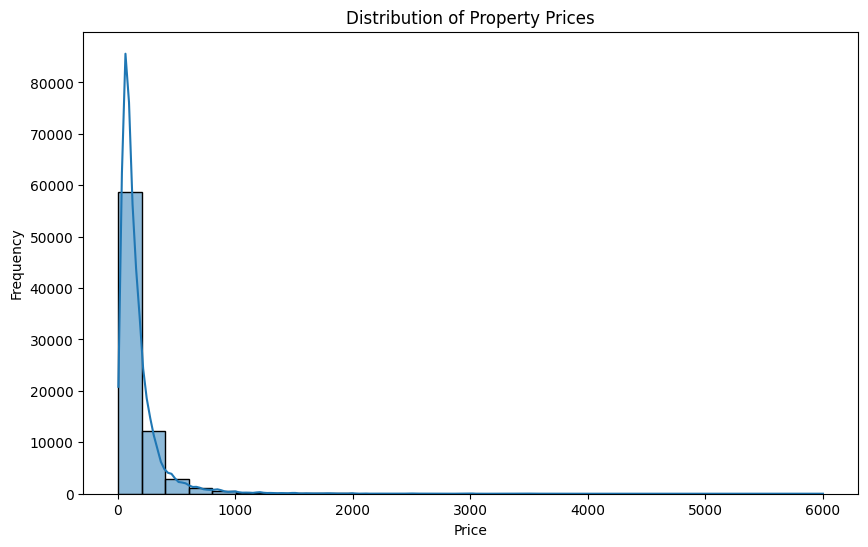

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data_new['price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

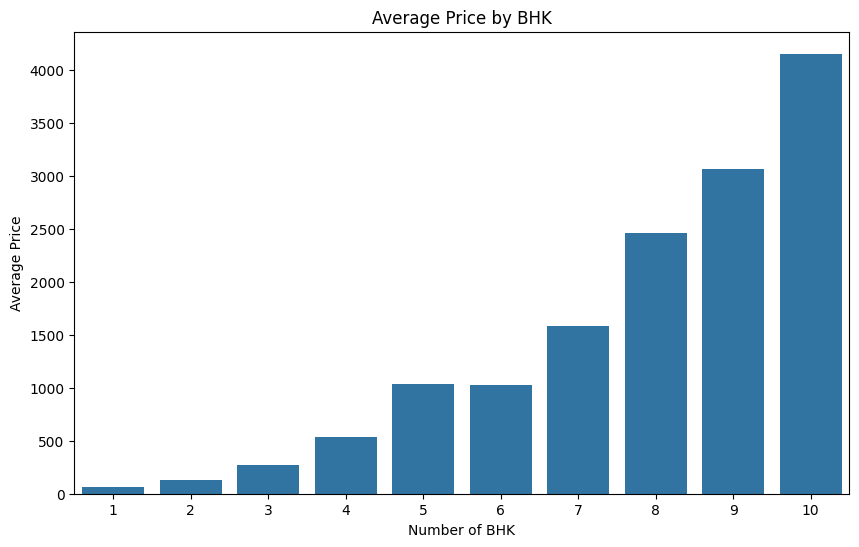

In [13]:
avg_price_bhk = data_new.groupby('bhk')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_bhk, x='bhk', y='price')
plt.title('Average Price by BHK')
plt.xlabel('Number of BHK')
plt.ylabel('Average Price')
plt.show()

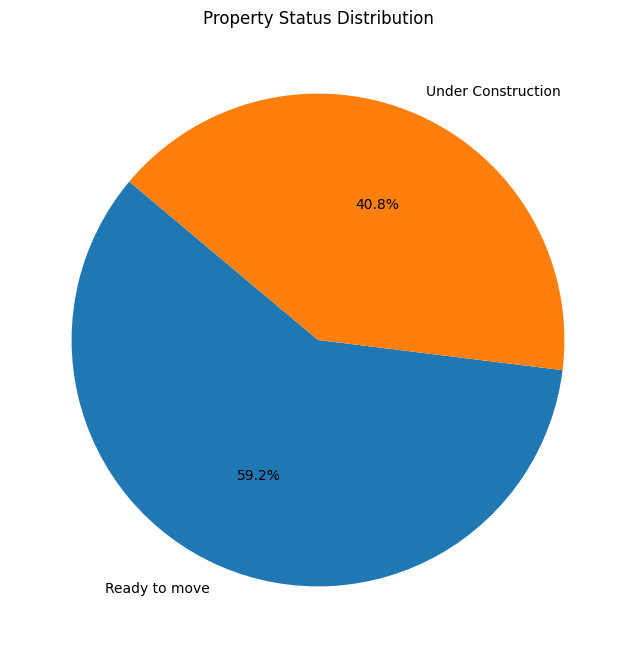

In [14]:
status_counts = data_new['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Property Status Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


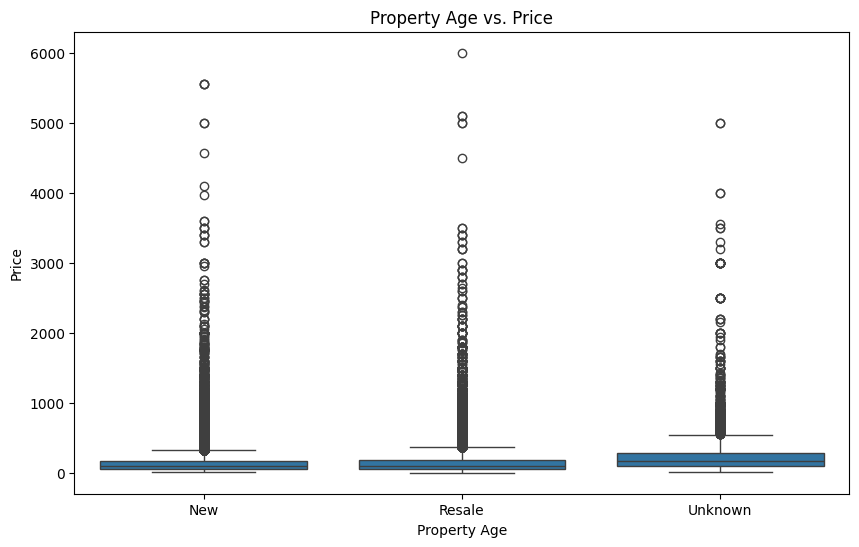

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_new, x='age', y='price')
plt.title('Property Age vs. Price')
plt.xlabel('Property Age')
plt.ylabel('Price')
plt.show()

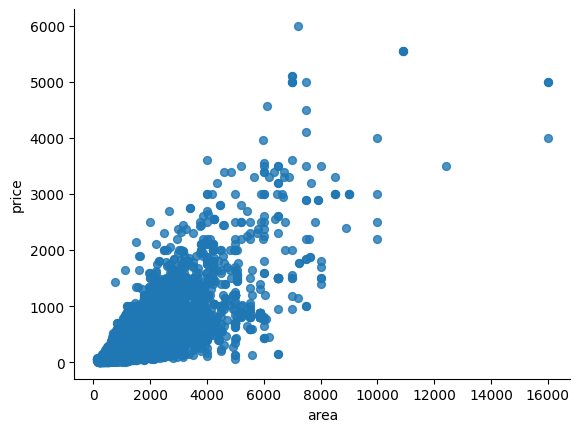

In [16]:
data_new.plot(kind='scatter', x='area', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
# Removing outliers to prevent skewness of data and avoiding overfitting

Q1 = data_new['price'].quantile(0.25)
Q3 = data_new['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data_new[(data_new['price'] >= lower_bound) & (data_new['price'] <= upper_bound)]

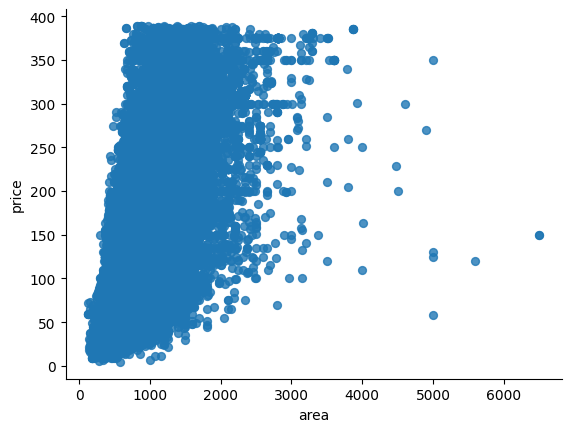

In [18]:
# @title area vs price

from matplotlib import pyplot as plt
data_filtered.plot(kind='scatter', x='area', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

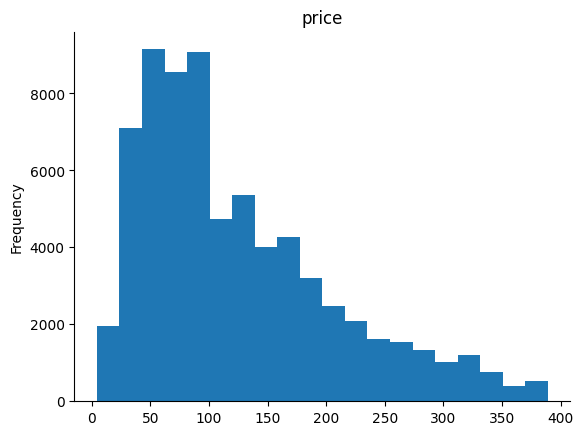

In [19]:
# @title price

data_filtered['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
print(data_filtered.dtypes)

bhk           int64
type         object
locality     object
area          int64
price       float64
region       object
status       object
age          object
dtype: object


# **DATA PRE-PROCESSING**

In [21]:
# Calculate the mean price for each locality
mean_price_by_locality = data_filtered.groupby('locality')['price'].mean()

# Create a new column with the target encoded values
data_filtered['locality_encoded'] = data_filtered['locality'].map(mean_price_by_locality)

# Drop the original 'locality' column
data_filtered = data_filtered.drop('locality', axis=1)

<ipython-input-21-bf1656d74e48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['locality_encoded'] = data_filtered['locality'].map(mean_price_by_locality)


In [22]:
categorical_cols = ['status', 'age', 'type', 'region']
data_encoded = pd.get_dummies(data_filtered, columns=categorical_cols, drop_first=True)

In [23]:
data_encoded.head()

,bhk,area,price,locality_encoded,status_Under Construction,age_Resale,age_Unknown,type_Independent House,type_Penthouse,type_Studio Apartment,...,region_Virar East,region_Virar West,region_Wadala,region_Warai,region_Worli,region_kandivali,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west
0,3,685,250.00,130.500000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,640,52.51,42.852500,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,610,173.00,207.461538,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,876,59.98,59.980000,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,659,94.11,92.480833,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
rows, columns = data_encoded.shape

print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 70387
Number of columns: 229


In [25]:
# Define features (X) and target variable (y)
X = data_encoded.drop('price', axis=1)  # All columns except 'price'
y = data_encoded['price']  # The 'price' column is the target variable

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

# **METRICS**

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) # mean squared error
rmse = np.sqrt(mse) # root mean squared error
r2 = r2_score(y_test, y_pred) # r squared
n = X.shape[0]  # Number of observations
p = X.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1) # adjusted r squared

print(f"Mean Squared Error: {mse}")
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f"R^2 Score: {r2}")
print(f"adjusted R^2 Score: {adj_r2}")

Mean Squared Error: 659.3840681662248
Root Mean Squared Error (RMSE): 25.678474802180617
R^2 Score: 0.9053996532650604
adjusted R^2 Score: 0.9050922203414371


In [29]:
# Calculate the minimum and maximum values of the 'price' column
price_min = data_new['price'].min()
price_max = data_new['price'].max()

# Calculate the range
price_range = price_max - price_min

print(f"Minimum Price: {price_min}")
print(f"Maximum Price: {price_max}")
print(f"Range of Price: {price_range}")

Minimum Price: 4.49
Maximum Price: 6000.0
Range of Price: 5995.51


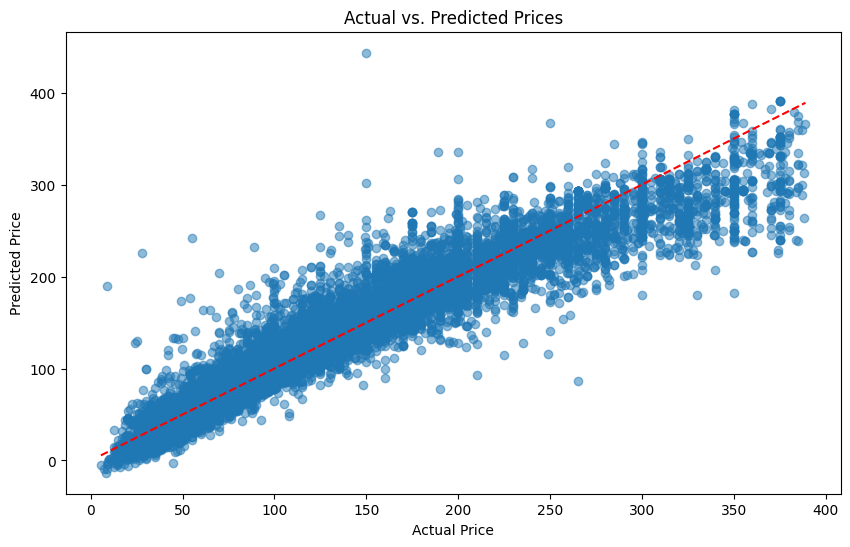

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()